In [3]:
# Set-Ups 
from flask import Flask, request, jsonify, send_file, render_template
from werkzeug.utils import secure_filename
import joblib
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy import create_engine, inspect, select, text, and_, or_, func
from sqlalchemy import Table, MetaData

from datetime import datetime
import calendar

import json
import matplotlib.pyplot as plt

In [4]:
# Connect to database
passwd = 'FyZSMAiH'
w_engine = create_engine('mysql+pymysql://e0376935:' + passwd + '@localhost:3306/olist', echo=True)

m2 = MetaData(bind=w_engine)
m2.reflect()

orders = Table("orders", m2, autoload=True)

2022-03-29 20:50:27,617 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2022-03-29 20:50:27,617 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-29 20:50:27,636 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2022-03-29 20:50:27,637 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-29 20:50:27,645 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2022-03-29 20:50:27,646 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-29 20:50:27,668 INFO sqlalchemy.engine.Engine SHOW FULL TABLES FROM `olist`
2022-03-29 20:50:27,669 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-29 20:50:27,688 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `customers`
2022-03-29 20:50:27,689 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-29 20:50:27,698 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `geo_avg`
2022-03-29 20:50:27,699 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-29 20:50:27,708 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `geo_loc`
2022-03-29 20:50:27,708 INFO sqlalch

In [5]:
# Try the query
day1 = datetime.strptime("2017-02-01", '%Y-%m-%d')
day28 = datetime.strptime("2017-02-28", '%Y-%m-%d')

stmt2 = select(func.count()).\
        where(orders.c.delivered_customer > orders.c.estimated_delivery).\
        where(orders.c.delivered_customer > day1).\
        where(orders.c.estimated_delivery < day28)


    
with w_engine.connect() as con:
        d2 = con.execute(stmt2)
    
s2 = d2.fetchall()
s2[0][0]

2022-03-29 20:50:29,994 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > orders.estimated_delivery AND orders.delivered_customer > %(delivered_customer_1)s AND orders.estimated_delivery < %(estimated_delivery_1)s
2022-03-29 20:50:29,995 INFO sqlalchemy.engine.Engine [generated in 0.00066s] {'delivered_customer_1': datetime.datetime(2017, 2, 1, 0, 0), 'estimated_delivery_1': datetime.datetime(2017, 2, 28, 0, 0)}


12

In [17]:
# Get firstlast date of month
str1 = "2022-01-"+str(calendar.monthrange(2002, 1)[1])
datetime.strptime(str1, '%Y-%m-%d')

datetime.datetime(2022, 1, 31, 0, 0)

In [25]:
calendar.monthrange(2017, 5)[1]

31

In [26]:
# Get monthly delays
time_list = []
delay_list = []

# Year 2016
for i in range(10,13):
    day1 = "2016-" + str(i) + "-01" 
    day31 = "2016-" + str(i) + "-" + str(calendar.monthrange(2016, i)[1])

    stmt2 = select(func.count()).\
        where(orders.c.delivered_customer > orders.c.estimated_delivery).\
        where(orders.c.delivered_customer > day1).\
        where(orders.c.estimated_delivery < day31)
    
    with w_engine.connect() as con:
        d2 = con.execute(stmt2)
    
    s2 = d2.fetchall()

    time_list.append("2016-" + str(i))
    delay_list.append(s2[0][0])


# Year 2017
for i in range(1,13):
    day1 = "2017-" + str(i)  + "-01" 
    day31 = "2017-" + str(i) + "-" + str(calendar.monthrange(2017, i)[1])

    stmt2 = select(func.count()).\
        where(orders.c.delivered_customer > orders.c.estimated_delivery).\
        where(orders.c.delivered_customer > day1).\
        where(orders.c.estimated_delivery < day31)
    
    with w_engine.connect() as con:
        d2 = con.execute(stmt2)
    
    s2 = d2.fetchall()

    time_list.append("2017-" + str(i))
    delay_list.append(s2[0][0])


# Year 2018
for i in range(1,9):
    day1 = "2018-" + str(i)  + "-01" 
    day31 = "2018-" + str(i) + "-" + str(calendar.monthrange(2018, i)[1])

    stmt2 = select(func.count()).\
        where(orders.c.delivered_customer > orders.c.estimated_delivery).\
        where(orders.c.delivered_customer > day1).\
        where(orders.c.estimated_delivery < day31)
    
    with w_engine.connect() as con:
        d2 = con.execute(stmt2)
    
    s2 = d2.fetchall()

    time_list.append("2018-" + str(i))
    delay_list.append(s2[0][0])

    

2022-03-23 08:45:03,726 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > orders.estimated_delivery AND orders.delivered_customer > %(delivered_customer_1)s AND orders.estimated_delivery < %(estimated_delivery_1)s
2022-03-23 08:45:03,727 INFO sqlalchemy.engine.Engine [cached since 191.2s ago] {'delivered_customer_1': '2016-10-01', 'estimated_delivery_1': '2016-10-31'}
2022-03-23 08:45:03,772 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > orders.estimated_delivery AND orders.delivered_customer > %(delivered_customer_1)s AND orders.estimated_delivery < %(estimated_delivery_1)s
2022-03-23 08:45:03,773 INFO sqlalchemy.engine.Engine [cached since 191.2s ago] {'delivered_customer_1': '2016-11-01', 'estimated_delivery_1': '2016-11-30'}
2022-03-23 08:45:03,818 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > orders.estimated_de

In [40]:
st1 = datetime.strptime("2016-10",'%Y-%m')
datetime.strftime(st1, '%Y-%m') > "2017-11"

False

In [43]:
time_list

['2016-10',
 '2016-11',
 '2016-12',
 '2017-1',
 '2017-2',
 '2017-3',
 '2017-4',
 '2017-5',
 '2017-6',
 '2017-7',
 '2017-8',
 '2017-9',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-1',
 '2018-2',
 '2018-3',
 '2018-4',
 '2018-5',
 '2018-6',
 '2018-7',
 '2018-8']

In [46]:
time_list[21:23]

['2018-7', '2018-8']

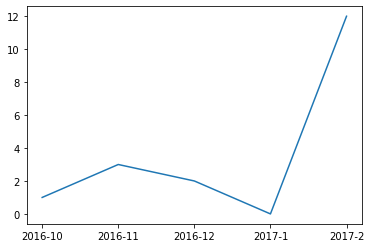

In [34]:
time_list
delay_list
plt.plot(time_list[0:5],delay_list[0:5])

Delayed data per day

In [1]:
str(6)

'6'

In [10]:
# Get daily delays
time_list = []
delay_list = []

# Year 2016
for i in range(10,13):
    for j in range(1,calendar.monthrange(2016, i)[1]+1):
        current = "2016-" + str(i) + "-" + str(j)
        stmt2 = select(func.count()).\
            where(orders.c.delivered_customer > current).\
            where(orders.c.estimated_delivery < current)

        with w_engine.connect() as con:
            d2 = con.execute(stmt2)

        s2 = d2.fetchall()
        time_list.append("2016-" + str(i) + "-" + str(j))
        delay_list.append(s2[0][0])

# Year 2017
for i in range(1,13):
    for j in range(1,calendar.monthrange(2017, i)[1]+1):
        current = "2017-" + str(i) + "-" + str(j)
        stmt2 = select(func.count()).\
            where(orders.c.delivered_customer > current).\
            where(orders.c.estimated_delivery < current)

        with w_engine.connect() as con:
            d2 = con.execute(stmt2)

        s2 = d2.fetchall()
        time_list.append("2017-" + str(i) + "-" + str(j))
        delay_list.append(s2[0][0])

# Year 2018
for i in range(1,9):
    for j in range(1,calendar.monthrange(2018, i)[1]+1):
        current = "2018-" + str(i) + "-" + str(j)
        stmt2 = select(func.count()).\
            where(orders.c.delivered_customer > current).\
            where(orders.c.estimated_delivery < current)

        with w_engine.connect() as con:
            d2 = con.execute(stmt2)

        s2 = d2.fetchall()
        time_list.append("2018-" + str(i) + "-" + str(j))
        delay_list.append(s2[0][0])

2022-03-29 20:53:29,128 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > %(delivered_customer_1)s AND orders.estimated_delivery < %(estimated_delivery_1)s
2022-03-29 20:53:29,129 INFO sqlalchemy.engine.Engine [cached since 173s ago] {'delivered_customer_1': '2016-10-1', 'estimated_delivery_1': '2016-10-1'}
2022-03-29 20:53:29,176 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > %(delivered_customer_1)s AND orders.estimated_delivery < %(estimated_delivery_1)s
2022-03-29 20:53:29,176 INFO sqlalchemy.engine.Engine [cached since 173s ago] {'delivered_customer_1': '2016-10-2', 'estimated_delivery_1': '2016-10-2'}
2022-03-29 20:53:29,226 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM orders 
WHERE orders.delivered_customer > %(delivered_customer_1)s AND orders.estimated_delivery < %(estimated_delivery_1)s
2022-03-29 20:53:29,226 INFO sqlalchemy.engine.Engine [cached

In [12]:
time_list[77:95]

['2016-12-17',
 '2016-12-18',
 '2016-12-19',
 '2016-12-20',
 '2016-12-21',
 '2016-12-22',
 '2016-12-23',
 '2016-12-24',
 '2016-12-25',
 '2016-12-26',
 '2016-12-27',
 '2016-12-28',
 '2016-12-29',
 '2016-12-30',
 '2016-12-31',
 '2017-1-1',
 '2017-1-2',
 '2017-1-3']

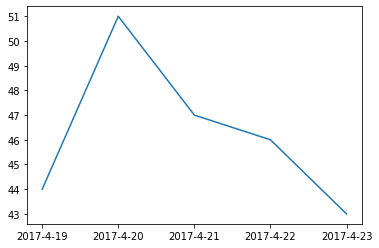

In [15]:
plt.plot(time_list[200:205],delay_list[200:205])